## Predicting Stroke using Machine Learning


In [1]:
#Các thư viện cần thiết trực quan và phân tích
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Các mô hình sẽ áp dụng
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#Bước tiền xử lý
from sklearn import preprocessing

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


1. id: Mã định danh duy nhất
2. gender:- Giới tính -
*  'Male'=Nam,
*  'Female'=Nữ,
*  'Other'=Khác
3. age: -Tuổi tác
4. hypertension: 
*   0- bệnh nhân không bị tăng huyết áp,  
*   1- bệnh nhân bị tăng huyết áp
5. heart_disease:
*   0- bệnh nhân không bị bệnh tim, 
*   1- bệnh nhân bị bệnh tim
6. ever_married: 'Yes'- Có, 'No'-Không
7. work_type: 
*   'Children'=Trẻ em, 
*   'Got_jov'=Nhân viên chính phủ, 
*   'Never_worked'=Chưa từng làm việc, 
*   'Private'=Tư nhân, 
*   'Self_employed'=Tự kinh doanh
8. Residence_type: 
*   'Rural'=Nông thôn
*   'Urban'=Thành thị
9. avg_glucose_level: mức đường huyết trung bình
10. bmi:chỉ số khối cơ thể
11. smoking_status:
*    'formely smoked': đã từng hút thuốc
*    'never smoked':chưa từng hút thuốc
*    'smokes':đang hút thuốc
*    'Unknown':Chưa biết
12. Stroke: 0- không bị đột quỵ, 1- bị bệnh đột quỵ

    *Ghi chú: "Unknown" trong thuộc tính 'Smoking_status' nghĩa là thông tin này không có sẵn cho bệnh nhân này.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,5110.0,36517.829354,21161.721625,67.00,17741.250,36932.000,54682.00,72940.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,28.893237,7.854067,10.30,23.500,28.100,33.10,97.60
stroke,5110.0,0.048728,0.215320,0.00,0.000,0.000,0.00,1.00


## Data Preprocessing

In [8]:
#Kiểm tra giá trị null
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [9]:
#Loại bỏ giá trị null
df.dropna(inplace=True)
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
#Loại bỏ các biến 'Other' trong 'gender'
df.drop(df[df['gender'] == "Other"].index , axis = 0 , inplace = True)
#Đưa kiểu dữ liệu Age về int
df['age'] = df['age'].astype('int64')

In [11]:
# Thay thể các 'fomerly smoked' thành 'smokes'
df['smoking_status'].iloc[df['smoking_status'] == 'formerly smoked'] = 'smokes'
# Loại bỏ các giá trị 'Unknown'
df.drop(df[df['smoking_status'] == 'Unknown'].index ,axis=0 , inplace=True)

C:\Users\nguye\AppData\Local\Temp\ipykernel_42636\3144165813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smoking_status'].iloc[df['smoking_status'] == 'formerly smoked'] = 'smokes'


In [12]:
#set lại index sau khi loại bỏ các dòng có giá trị null
df.drop(["id"] ,axis=1, inplace=True)
df.reset_index(drop=True,inplace=True)

In [13]:
df.shape

(3425, 11)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             3425 non-null   object 
 1   age                3425 non-null   int64  
 2   hypertension       3425 non-null   int64  
 3   heart_disease      3425 non-null   int64  
 4   ever_married       3425 non-null   object 
 5   work_type          3425 non-null   object 
 6   Residence_type     3425 non-null   object 
 7   avg_glucose_level  3425 non-null   float64
 8   bmi                3425 non-null   float64
 9   smoking_status     3425 non-null   object 
 10  stroke             3425 non-null   int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 294.5+ KB


In [15]:
categorical_cols=list(df.select_dtypes(include='O').columns) + ["stroke" , "hypertension" , "heart_disease"]
categorical_cols

['gender',
 'ever_married',
 'work_type',
 'Residence_type',
 'smoking_status',
 'stroke',
 'hypertension',
 'heart_disease']

In [16]:
df[categorical_cols] = df[categorical_cols].astype('object')
categorical_cols.remove('stroke')

In [17]:
for i in categorical_cols:
    display(df[i].value_counts())
    print("#"*20)

Female    2086
Male      1339
Name: gender, dtype: int64

####################


Yes    2599
No      826
Name: ever_married, dtype: int64

####################


Private          2200
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: work_type, dtype: int64

####################


Urban    1745
Rural    1680
Name: Residence_type, dtype: int64

####################


never smoked    1852
smokes          1573
Name: smoking_status, dtype: int64

####################


0    3017
1     408
Name: hypertension, dtype: int64

####################


0    3219
1     206
Name: heart_disease, dtype: int64

####################


In [18]:
df['stroke'].value_counts() #imbalance

0    3245
1     180
Name: stroke, dtype: int64

In [19]:
print("Dữ liệu ban đầu của cột 'bmi':")
print(df['bmi'].head())

Dữ liệu ban đầu của cột 'bmi':
0    36.6
1    32.5
2    34.4
3    24.0
4    29.0
Name: bmi, dtype: float64


In [20]:
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal weight'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obesity'

In [21]:
#Áp dụng hàm cho cột 'bmi' và thay thế giá trị ban đầu
df['bmi'] = df['bmi'].apply(categorize_bmi)
# Kiểm tra lại dữ liệu sau khi thay thế giá trị trong cột 'bmi'
print("Dữ liệu sau khi thay thế giá trị trong cột 'bmi':")
print(df['bmi'].head())

Dữ liệu sau khi thay thế giá trị trong cột 'bmi':
0          Obesity
1          Obesity
2          Obesity
3    Normal weight
4       Overweight
Name: bmi, dtype: object


In [22]:
def categorize_glucose_level(glucose):
    if glucose < 100:
        return 'Normal'
    elif 100 <= glucose < 126:
        return 'Prediabetes'
    else:
        return 'Diabetes'

In [23]:
#Áp dụng hàm cho cột 'avg_glucose_level' và thay thế giá trị ban đầu
df['avg_glucose_level'] = df['avg_glucose_level'].apply(categorize_glucose_level)
# Kiểm tra lại dữ liệu sau khi thay thế giá trị trong cột 'avg_glucose_level'
print("Dữ liệu sau khi thay thế giá trị trong cột 'avg_glucose_level':")
print(df['avg_glucose_level'].head())

Dữ liệu sau khi thay thế giá trị trong cột 'avg_glucose_level':
0       Diabetes
1    Prediabetes
2       Diabetes
3       Diabetes
4       Diabetes
Name: avg_glucose_level, dtype: object


In [24]:
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,Diabetes,Obesity,smokes,1
1,Male,80,0,1,Yes,Private,Rural,Prediabetes,Obesity,never smoked,1
2,Female,49,0,0,Yes,Private,Urban,Diabetes,Obesity,smokes,1
3,Female,79,1,0,Yes,Self-employed,Rural,Diabetes,Normal weight,never smoked,1
4,Male,81,0,0,Yes,Private,Urban,Diabetes,Overweight,smokes,1
5,Male,74,1,1,Yes,Private,Rural,Normal,Overweight,never smoked,1
6,Female,69,0,0,No,Private,Urban,Normal,Normal weight,never smoked,1
7,Female,81,1,0,Yes,Private,Rural,Normal,Overweight,never smoked,1
8,Female,61,0,1,Yes,Govt_job,Rural,Prediabetes,Obesity,smokes,1
9,Female,54,0,0,Yes,Private,Urban,Prediabetes,Overweight,smokes,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3425 entries, 0 to 3424
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gender             3425 non-null   object
 1   age                3425 non-null   int64 
 2   hypertension       3425 non-null   object
 3   heart_disease      3425 non-null   object
 4   ever_married       3425 non-null   object
 5   work_type          3425 non-null   object
 6   Residence_type     3425 non-null   object
 7   avg_glucose_level  3425 non-null   object
 8   bmi                3425 non-null   object
 9   smoking_status     3425 non-null   object
 10  stroke             3425 non-null   object
dtypes: int64(1), object(10)
memory usage: 294.5+ KB


In [26]:
X=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type' , 'avg_glucose_level', 'bmi', 'smoking_status']].values
X[0:5]

array([['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 'Diabetes',
        'Obesity', 'smokes'],
       ['Male', 80, 0, 1, 'Yes', 'Private', 'Rural', 'Prediabetes',
        'Obesity', 'never smoked'],
       ['Female', 49, 0, 0, 'Yes', 'Private', 'Urban', 'Diabetes',
        'Obesity', 'smokes'],
       ['Female', 79, 1, 0, 'Yes', 'Self-employed', 'Rural', 'Diabetes',
        'Normal weight', 'never smoked'],
       ['Male', 81, 0, 0, 'Yes', 'Private', 'Urban', 'Diabetes',
        'Overweight', 'smokes']], dtype=object)

In [27]:
# Kiểm tra các giá trị độc nhất trong các cột phân loại
print("Unique values in 'gender':", pd.unique(X[:, 0]))
print("Unique values in 'ever_married':", pd.unique(X[:, 4]))
print("Unique values in 'work_type':", pd.unique(X[:, 5]))
print("Unique values in 'Residence_type':", pd.unique(X[:, 6]))
print("Unique values in 'avg_glucose_level':", pd.unique(X[:, 7]))
print("Unique values in 'bmi':", pd.unique(X[:, 8]))
print("Unique values in 'smoking_status':", pd.unique(X[:, 9]))

Unique values in 'gender': ['Male' 'Female']
Unique values in 'ever_married': ['Yes' 'No']
Unique values in 'work_type': ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Unique values in 'Residence_type': ['Urban' 'Rural']
Unique values in 'avg_glucose_level': ['Diabetes' 'Prediabetes' 'Normal']
Unique values in 'bmi': ['Obesity' 'Normal weight' 'Overweight' 'Underweight']
Unique values in 'smoking_status': ['smokes' 'never smoked']


In [28]:
# Mã hóa các biến phân loại
le_gender = preprocessing.LabelEncoder()
le_gender.fit(['Male', 'Female'])
X[:, 0] = le_gender.transform(X[:, 0])

le_married = preprocessing.LabelEncoder()
le_married.fit(['Yes', 'No'])
X[:, 4] = le_married.transform(X[:, 4])

le_work = preprocessing.LabelEncoder()
le_work.fit(['children', 'Govt_job', 'Never_worked', 'Private', 'Self-employed'])
X[:, 5] = le_work.transform(X[:, 5])

le_residence = preprocessing.LabelEncoder()
le_residence.fit(['Urban','Rural'])
X[:, 6] = le_residence.transform(X[:, 6])

le_gluco = preprocessing.LabelEncoder()
le_gluco.fit(['Normal', 'Prediabetes', 'Diabetes'])
X[:, 7] = le_gluco.transform(X[:, 7])

le_bmi = preprocessing.LabelEncoder()
le_bmi.fit(['Underweight', 'Normal weight', 'Overweight', 'Obesity'])
X[:, 8] = le_bmi.transform(X[:, 8])

le_smoking = preprocessing.LabelEncoder()
le_smoking.fit(['never smoked', 'smokes'])
X[:, 9] = le_smoking.transform(X[:, 9])

# Kiểm tra lại dữ liệu sau khi mã hóa
print(X[:10])



[[1 67 0 1 1 2 1 0 1 1]
 [1 80 0 1 1 2 0 2 1 0]
 [0 49 0 0 1 2 1 0 1 1]
 [0 79 1 0 1 3 0 0 0 0]
 [1 81 0 0 1 2 1 0 2 1]
 [1 74 1 1 1 2 0 1 2 0]
 [0 69 0 0 0 2 1 1 0 0]
 [0 81 1 0 1 2 0 1 2 0]
 [0 61 0 1 1 0 0 2 1 1]
 [0 54 0 0 1 2 1 2 2 1]]


In [29]:
y = df["stroke"]
print(y[0:5])

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: object


In [30]:
#Thay thế các biến phân loại đã mã hóa vào data
df['gender'] = le_gender.transform(df['gender'])
df['ever_married'] = le_married.transform(df['ever_married'])
df['work_type'] = le_work.transform(df['work_type'])
df['Residence_type'] = le_residence.transform(df['Residence_type'])
df['avg_glucose_level'] = le_gluco.transform(df['avg_glucose_level'])
df['bmi'] = le_bmi.transform(df['bmi'])
df['smoking_status'] = le_smoking.transform(df['smoking_status'])

# Kiểm tra lại dữ liệu sau khi mã hóa
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,0,1,1,1
1,1,80,0,1,1,2,0,2,1,0,1
2,0,49,0,0,1,2,1,0,1,1,1
3,0,79,1,0,1,3,0,0,0,0,1
4,1,81,0,0,1,2,1,0,2,1,1


## EDA

    gender:
*  Male -> 0
*  Female -> 1

    ever_married:
   
*  Yes -> 1
*  No -> 0

    work_type:

*  children -> 0
*  Govt_job -> 1
*  Never_worked -> 2
*  Private -> 3
*  Self-employed -> 4

    Residence_type:
*   Urban -> 0
*   Rural ->1

    avg_glucose_level:

*  Normal -> 1
*  Prediabetes -> 2
*  Diabetes -> 0

    bmi:

*  Underweight -> 3
*  Normal weight -> 1
*  Overweight -> 2
*  Obesity -> 0

    smoking_status:

*  never smoked -> 0
*  smokes -> 1

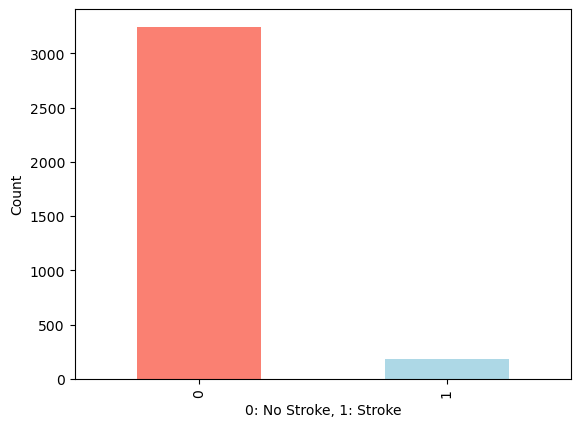

In [31]:
df['stroke'].value_counts().plot.bar(color=['salmon', 'lightblue']);
plt.xlabel('0: No Stroke, 1: Stroke')
plt.ylabel('Count');

In [32]:
df['gender'].value_counts()

0    2086
1    1339
Name: gender, dtype: int64

In [33]:
pd.crosstab(df['gender'], df['stroke'])

stroke,0,1
gender,,
0,1981,105
1,1264,75


Nhóm nam giới:

Tổng số nam giới: 1981 + 105 = 2086

Tỷ lệ nam giới bị đột quỵ: (105 / 2086) * 100 ≈ 5.03%

Nhóm nữ giới:

Tổng số nữ giới: 1264 + 75 = 1339

Tỷ lệ nữ giới bị đột quỵ: (75 / 1339) * 100 ≈ 5.60%

Kết luận:

Nhóm nam giới: Trong số nam giới, khoảng 5.03% bị đột quỵ.

Nhóm nữ giới: Trong số nữ giới, khoảng 5.60% bị đột quỵ.

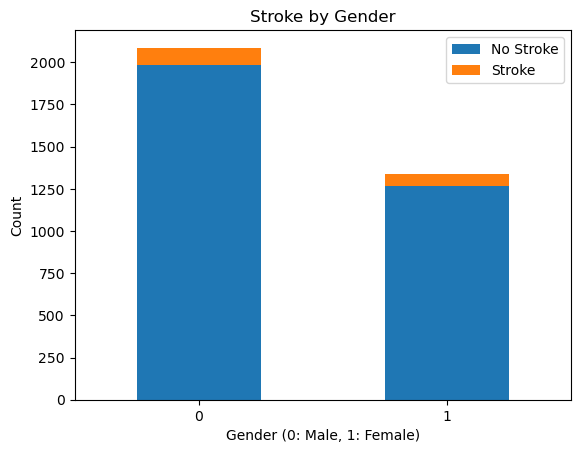

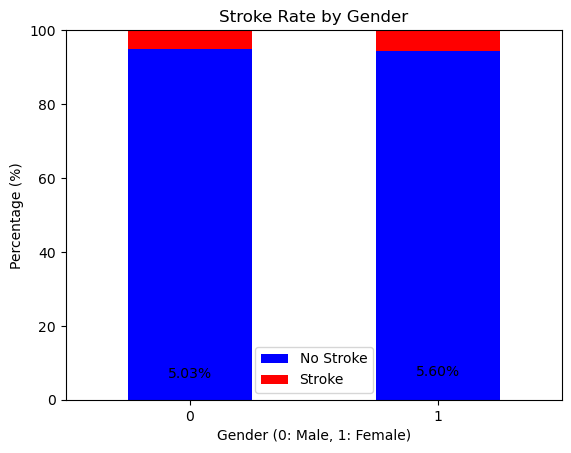

In [34]:
# Tạo bảng chéo giữa giới tính và đột quỵ
gender_stroke_crosstab = pd.crosstab(df['gender'], df['stroke'])

# Vẽ biểu đồ thanh số lượng
gender_stroke_crosstab.plot(kind='bar', stacked=True)
plt.title('Stroke by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.show()

# Tính tỷ lệ phần trăm bệnh nhân bị đột quỵ
stroke_rate = gender_stroke_crosstab.div(gender_stroke_crosstab.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ thanh tỷ lệ phần trăm
stroke_rate.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Stroke Rate by Gender')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Percentage (%)')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Giới hạn trục y từ 0 đến 100

# Hiển thị giá trị trên các cột
for index, value in enumerate(stroke_rate[1]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')
plt.show()


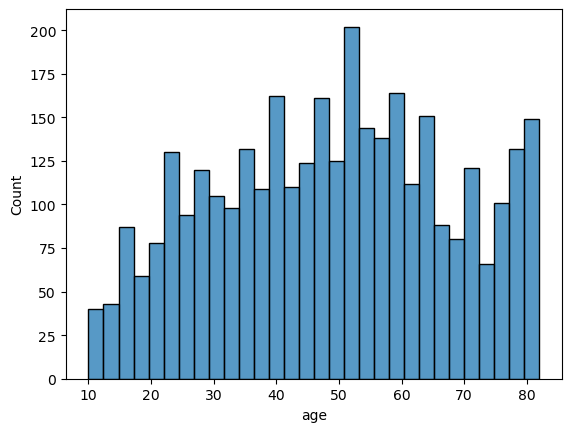

In [35]:
sns.histplot(data=df, x=df['age'], bins=30);

In [45]:
pd.crosstab(df['bmi'], df['stroke'])

stroke,0,1
bmi,,
0,698,29
1,1488,89
2,1011,61
3,48,1


Obesity (0): Có 698 người không bị đột quỵ và 29 người bị đột quỵ.

Normal weight (1): Có 1488 người không bị đột quỵ và 89 người bị đột quỵ.

Overweight (2): Có 1011 người không bị đột quỵ và 61 người bị đột quỵ.

Underweight (3): Có 48 người không bị đột quỵ và 1 người bị đột quỵ.

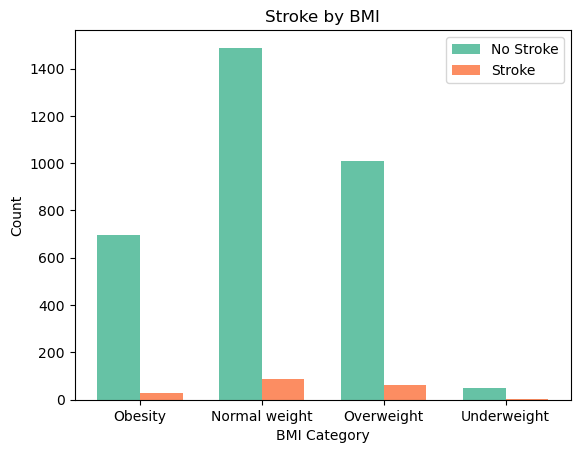

In [50]:
# Dữ liệu từ bảng chéo
bmi_stroke_crosstab = pd.crosstab(df['bmi'], df['stroke'])

# Tạo DataFrame từ dữ liệu
df_bmi_stroke = bmi_stroke_crosstab.reset_index()

# Vị trí của các thanh
x = np.arange(len(df_bmi_stroke))

# Độ rộng của mỗi thanh
width = 0.35

# Vẽ biểu đồ
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, df_bmi_stroke[0], width, label='No Stroke', color='#66c2a5')
bars2 = ax.bar(x + width/2, df_bmi_stroke[1], width, label='Stroke', color='#fc8d62')

# Thêm các nhãn và tiêu đề
ax.set_xlabel('BMI Category')
ax.set_ylabel('Count')
ax.set_title('Stroke by BMI')
ax.set_xticks(x)
ax.set_xticklabels(['Obesity', 'Normal weight', 'Overweight', 'Underweight'])
ax.legend()

plt.xticks(rotation=0)
plt.show()


Từ biểu đồ này, ta có thể thấy rằng nhóm người có cân nặng bình thường (Normal weight) có số lượng người bị đột quỵ cao nhất, tiếp theo là nhóm thừa cân (Overweight).

Nhóm béo phì (Obesity) có số người bị đột quỵ thấp nhất.

Do có số lượng người không bị đột quỵ khá cao. Điều này có thể gợi ý rằng cân nặng bình thường không đảm bảo hoàn toàn cho việc tránh nguy cơ đột quỵ, và cần phải xem xét các yếu tố khác nhau.

In [43]:
pd.crosstab([df['age'], df['hypertension']], df['stroke'])

stroke             0  1
age hypertension       
10  0              9  0
11  0             12  0
12  0             19  0
13  0             19  0
14  0             24  0
...               .. ..
80  1             10  6
81  0             22  9
    1             13  3
82  0             30  5
    1              8  3

[129 rows x 2 columns]

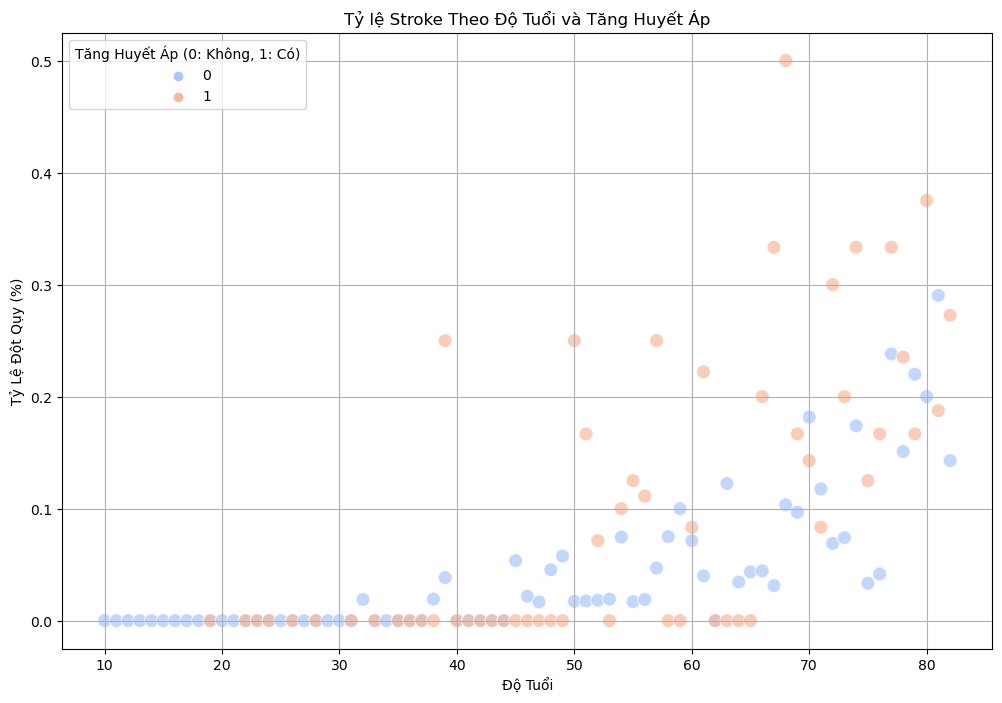

In [36]:
# Tạo ma trận giao chéo giữa 'age', 'hypertension', và 'stroke'
age_hypertension_stroke_crosstab = pd.crosstab([df['age'], df['hypertension']], df['stroke'])

# Tính tỷ lệ stroke cho mỗi nhóm (age, hypertension)
age_hypertension_stroke_rate = age_hypertension_stroke_crosstab[1] / age_hypertension_stroke_crosstab.sum(axis=1)

# Chuyển tỷ lệ stroke thành data
age_hypertension_stroke_rate_df = age_hypertension_stroke_rate.reset_index()
age_hypertension_stroke_rate_df.columns = ['Age', 'Hypertension', 'Stroke_Rate']

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Stroke_Rate', hue='Hypertension', data=age_hypertension_stroke_rate_df, palette='coolwarm', s=100, alpha=0.7)

plt.title('Tỷ lệ Stroke Theo Độ Tuổi và Tăng Huyết Áp')
plt.xlabel('Độ Tuổi')
plt.ylabel('Tỷ Lệ Đột Qụy (%)')
plt.legend(title='Tăng Huyết Áp (0: Không, 1: Có)')
plt.grid(True)
plt.show()

In [44]:
pd.crosstab([df['age'], df['avg_glucose_level']], df['stroke'])

stroke                  0  1
age avg_glucose_level       
10  1                   8  0
    2                   1  0
11  0                   1  0
    1                   9  0
    2                   2  0
...                    .. ..
81  1                  18  9
    2                   5  0
82  0                  12  4
    1                  18  3
    2                   8  1

[218 rows x 2 columns]

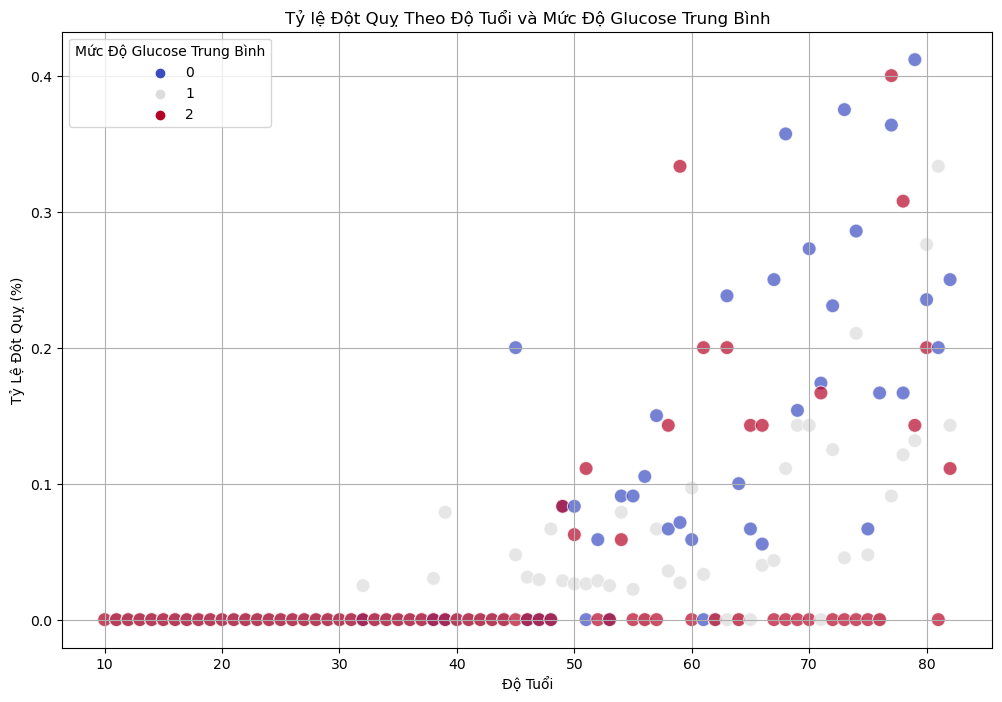

In [37]:
# Tạo ma trận giao chéo giữa 'age', 'avg_glucose_level', và 'stroke'
age_glucose_stroke_crosstab = pd.crosstab([df['age'], df['avg_glucose_level']], df['stroke'])

# Tính tỷ lệ stroke cho mỗi nhóm (age, avg_glucose_level)
age_glucose_stroke_rate = age_glucose_stroke_crosstab[1] / age_glucose_stroke_crosstab.sum(axis=1)

# Chuyển tỷ lệ stroke thành DataFrame
age_glucose_stroke_rate_df = age_glucose_stroke_rate.reset_index()
age_glucose_stroke_rate_df.columns = ['Age', 'Avg_Glucose_Level', 'Stroke_Rate']

# Vẽ scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Age', y='Stroke_Rate', hue='Avg_Glucose_Level', data=age_glucose_stroke_rate_df, palette='coolwarm', s=100, alpha=0.7)

plt.title('Tỷ lệ Đột Quỵ Theo Độ Tuổi và Mức Độ Glucose Trung Bình')
plt.xlabel('Độ Tuổi')
plt.ylabel('Tỷ Lệ Đột Quỵ (%)')
plt.legend(title='Mức Độ Glucose Trung Bình')
plt.grid(True)
plt.show()


In [38]:
df['heart_disease'].value_counts()

0    3219
1     206
Name: heart_disease, dtype: int64

In [39]:
pd.crosstab(df['heart_disease'], df['stroke'])

stroke,0,1
heart_disease,,
0,3075,144
1,170,36


Nhóm không bị bệnh tim:

Tổng số bệnh nhân: 3075 + 144 = 3219
Tỷ lệ bệnh nhân bị đột quỵ: (144 / 3219) * 100 ≈ 4.47%

Nhóm bị bệnh tim:

Tổng số bệnh nhân: 170 + 36 = 206
Tỷ lệ bệnh nhân bị đột quỵ: (36 / 206) * 100 ≈ 17.48%

Kết luận:

Nhóm không bị bệnh tim: Trong số những người không bị bệnh tim, chỉ có khoảng 4.47% bị đột quỵ.

Nhóm bị bệnh tim: Trong số những người bị bệnh tim, có khoảng 17.48% bị đột quỵ.

Điều này cho thấy rằng bệnh nhân bị bệnh tim có nguy cơ bị đột quỵ cao hơn so với những người không bị bệnh tim.

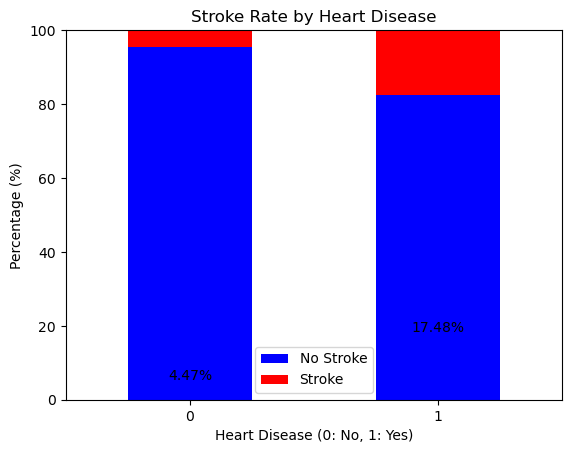

In [40]:
heart_stroke_crosstab = pd.crosstab(df['heart_disease'], df['stroke'])
# Tính tỷ lệ phần trăm bệnh nhân có đột quỵ trong mỗi nhóm
stroke_rate = heart_stroke_crosstab.div(heart_stroke_crosstab.sum(axis=1), axis=0) * 100

# Vẽ biểu đồ thanh tỷ lệ phần trăm
stroke_rate.plot(kind='bar', stacked=True, color=['blue', 'red'])
plt.title('Stroke Rate by Heart Disease')
plt.xlabel('Heart Disease (0: No, 1: Yes)')
plt.ylabel('Percentage (%)')
plt.legend(['No Stroke', 'Stroke'])
plt.xticks(rotation=0)
plt.ylim(0, 100)  # Giới hạn trục y từ 0 đến 100

# Hiển thị giá trị trên các cột
for index, value in enumerate(stroke_rate[1]):
    plt.text(index, value + 1, f'{value:.2f}%', ha='center')

plt.show()


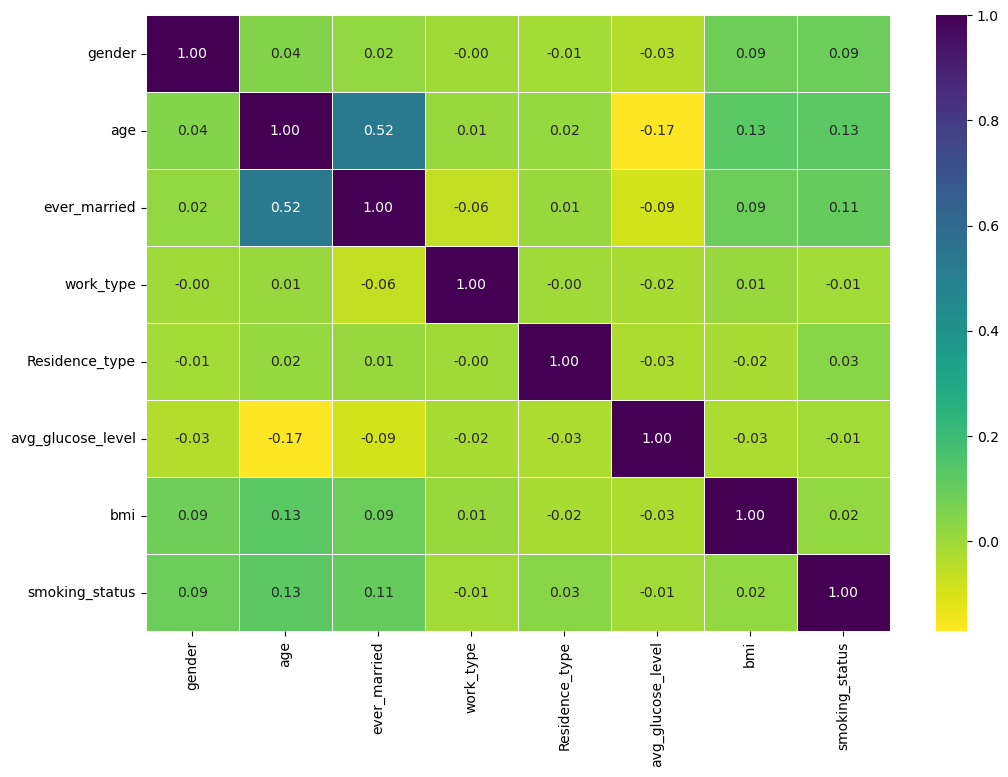

In [42]:
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, linewidth=0.5, fmt='.2f', cmap='viridis_r');

## Modelling

In [65]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,0,1,1,1
1,1,80,0,1,1,2,0,2,1,0,1
2,0,49,0,0,1,2,1,0,1,1,1
3,0,79,1,0,1,3,0,0,0,0,1
4,1,81,0,0,1,2,1,0,2,1,1


In [68]:
X

array([[1, 67, 0, ..., 0, 1, 1],
       [1, 80, 0, ..., 2, 1, 0],
       [0, 49, 0, ..., 0, 1, 1],
       ...,
       [0, 81, 0, ..., 2, 1, 0],
       [0, 35, 0, ..., 1, 1, 0],
       [1, 51, 0, ..., 0, 2, 1]], dtype=object)

In [69]:
y

0       1
1       1
2       1
3       1
4       1
       ..
3420    0
3421    0
3422    0
3423    0
3424    0
Name: stroke, Length: 3425, dtype: object